In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score,precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Никита\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [86]:
df=pd.read_csv("./ml/labeled.csv")

In [87]:
df

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0
...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1.0
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1.0
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0.0
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1.0


In [88]:
df.shape

(14412, 2)

In [89]:
df["toxic"]=df["toxic"].apply(int)
#apply приводит к инту каждую строку (тк лучше их переводить в инт а не во флоат)
df

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1
...,...,...
14407,Вонючий совковый скот прибежал и ноет. А вот и...,1
14408,А кого любить? Гоблина тупорылого что-ли? Или ...,1
14409,"Посмотрел Утомленных солнцем 2. И оказалось, ч...",0
14410,КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ Н...,1


In [90]:
df["toxic"].value_counts()
#примерно 1 к 2 (те примерно данные сбалансированы)

0    9586
1    4826
Name: toxic, dtype: int64

In [91]:
#посмотрим на качество разметки данных:

In [92]:
for c in df[df["toxic"]==1]["comment"].head(5):
    print(c)

Верблюдов-то за что? Дебилы, бл...

Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

Собаке - собачья смерть

Страницу обнови, дебил. Это тоже не оскорбление, а доказанный факт - не-дебил про себя во множественном числе писать не будет. Или мы в тебя верим - это ты и твои воображаемые друзья?

тебя не убедил 6-страничный пдф в том, что Скрипалей отравила Россия? Анализировать и думать пытаешься? Ватник что ли?)



In [93]:
for c in df[df["toxic"]==0]["comment"].head(5):
    print(c)

В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [94]:
#качество разметки неидеальное

In [95]:
train_df, test_df = train_test_split(df,test_size=500)
test_df.shape

(500, 2)

In [96]:
train_df["toxic"].value_counts()

0    9258
1    4654
Name: toxic, dtype: int64

In [97]:
#Будем использовать элементарную модель - логистическую регрессию,
#но перед этим обработаем данные и сделаем из них вещественные векторы

In [98]:
#Разбиваем сначала текст на токены
# Удалить те токены, которые не несут смысла (междометия,знаки препинания)
# к каждому слову применяем стеминг (удаляем окончание и приводим к нижнему регистру)

In [99]:
nltk.download('stopwords') #загрузили стоп слова

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Никита\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
sentence_example =df.iloc[1]["comment"] #берем 1 комментарий
tokens = word_tokenize(sentence_example, language="russian") #функция из nltk(библ для анализа текста)
#она разбивает по пробелам и по знакам пунктуации
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation] #этот массив содержит все знаки пунктуации (нашли их через string)
russian_stop_words=stopwords.words("russian") # из nltk получаем стоп слова русские
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words] #и также удаляем стоп слова
snowball = SnowballStemmer(language="russian") 
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation] #приводим к нижеему регистру и удаляем окончания

In [101]:
print(f"Исходный текст: {sentence_example}")
print("-----------------------------------")
print(f"Токены: {tokens}")
print("-----------------------------------")
print(f"Токены без пунктуации: {tokens_without_punctuation}")
print("-----------------------------------")
print(f"Токены без пунктуации и стоп слов: {tokens_without_stop_words_and_punctuation}")
print("-----------------------------------")
print(f"Токены после стемминга: {stemmed_tokens}")
print("-----------------------------------")

Исходный текст: Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

-----------------------------------
Токены: ['Хохлы', ',', 'это', 'отдушина', 'затюканого', 'россиянина', ',', 'мол', ',', 'вон', ',', 'а', 'у', 'хохлов', 'еще', 'хуже', '.', 'Если', 'бы', 'хохлов', 'не', 'было', ',', 'кисель', 'их', 'бы', 'придумал', '.']
-----------------------------------
Токены без пунктуации: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'а', 'у', 'хохлов', 'еще', 'хуже', 'Если', 'бы', 'хохлов', 'не', 'было', 'кисель', 'их', 'бы', 'придумал']
-----------------------------------
Токены без пунктуации и стоп слов: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'хохлов', 'хуже', 'Если', 'хохлов', 'кисель', 'придумал']
-----------------------------------
Токены после стемминга: ['хохл', 'эт', 'отдушин', 'затюкан', 'россиянин', 'мол', 'вон', 'хохл', 'хуж', 'есл', 'хохл', 'кисел', 'прид

In [102]:
#Реализуем то же самое для всех предложений:
snowball= SnowballStemmer(language="russian") #загружаем алгоритм стемминга
russian_stop_words = stopwords.words("russian")

def tokenize_sentence(sentence: str, remove_stop_words: bool=True):
    tokens = word_tokenize(sentence,language="russian") #токенизируем
    tokens = [i for i in tokens if i not in string.punctuation] #удаляем пунтуацию
    if remove_stop_words: #если нужно удаляем стоп слова
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens] #делаем стемминг
    return tokens

        

In [103]:
#проверим рабооту функции 
tokenize_sentence(sentence_example)

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

In [104]:
#закодируем последовательность токенов с TFIDF (без эмбеддингов) 
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True)) #переопределили токенайзер на наш


In [141]:
#обучим его и получим фичи которые уже можно передавать в модель мл
features = vectorizer.fit_transform(train_df["comment"])
features

<13912x35426 sparse matrix of type '<class 'numpy.float64'>'
	with 218982 stored elements in Compressed Sparse Row format>

In [106]:
model = LogisticRegression(random_state=0) #обеспечиваем воспроизводимость результатов
model.fit(features, train_df["toxic"])

LogisticRegression(random_state=0)

In [107]:
model.predict(features[0])

array([1], dtype=int64)

In [140]:
train_df["comment"].iloc[0]

'Зажигалкой коптиш ложку и собираеш\n'

In [109]:
#создадим конвейер 
model_pipeline =Pipeline([
    ("vectorizer",TfidfVectorizer(tokenizer=lambda x:tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0))
])

In [110]:
model_pipeline.fit(train_df["comment"], train_df["toxic"]) #обучаем пайплайн (мы передаем список предложений и их лейблы)
#после этого для предикта сможем передавать уже просто текст 

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x0000010D8B027AF0>)),
                ('model', LogisticRegression(random_state=0))])

In [111]:
model_pipeline.predict(["как дела как дела это новый кадиллак"])

array([0], dtype=int64)

In [112]:
model_pipeline.predict(["ну-ка иди отсюда в ..."])

array([1], dtype=int64)

In [113]:
#метрики будут precision recall
precision_score(y_true = test_df["toxic"], y_pred = model_pipeline.predict(test_df["comment"]))

0.9117647058823529

In [114]:
recall_score(y_true = test_df["toxic"], y_pred= model_pipeline.predict(test_df["comment"]))

0.7209302325581395

In [115]:
#модель логистическиой регрессии (предикт) возвращает вероятности и спранивает значение с порогом и потом делаем вывод
#будем двигать threshold
prec, rec, threshold = precision_recall_curve(y_true=test_df["toxic"], probas_pred = model_pipeline.predict_proba(test_df["comment"])[:,1])

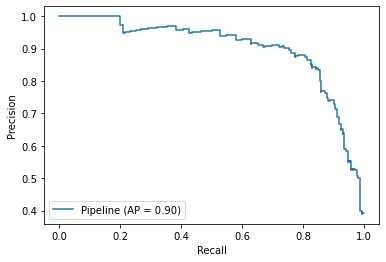

In [116]:
plot_precision_recall_curve(estimator=model_pipeline, X=test_df["comment"],y=test_df["toxic"])

In [117]:
#найдем индексы когда пресижн больше 0.95
np.where(prec>0.95)

(array([343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355,
        356, 357, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372,
        373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385,
        386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 401,
        402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414,
        415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427,
        428, 429, 430, 431, 432, 433, 434, 435, 436, 437], dtype=int64),)

In [118]:
threshold[364]

0.6555944194634834

In [119]:
#вызовем предсказание с этим порогом 
precision_score(y_true=test_df["toxic"],y_pred=model_pipeline.predict_proba(test_df["comment"])[:,1]>threshold[364])

0.958904109589041

In [120]:
#посчитаем рекол при этом пороге
recall_score(y_true=test_df["toxic"],y_pred=model_pipeline.predict_proba(test_df["comment"])[:,1]>threshold[364])

0.4069767441860465

In [121]:
#он вышел достаточно низкий

In [122]:
#подберем гиперпараметры чтобы улучшить модель
#будем менять коэф регуляризации C


In [123]:
#создадим новый конвейер 
grid_pipeline =Pipeline([
    ("vectorizer",TfidfVectorizer(tokenizer=lambda x:tokenize_sentence(x, remove_stop_words=True))),
    ("model",GridSearchCV(LogisticRegression(random_state=0),
                         param_grid={'C':[0.1,1,10.]}, #стандартный это 1
                         cv=3, # три фолда во время кроссвалидации
                         verbose=4)) #значит выводим максимум информации
])

In [124]:
grid_pipeline.fit(train_df["comment"], train_df["toxic"])

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.688, total=   0.2s
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ............................... C=0.1, score=0.686, total=   0.2s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.688, total=   0.2s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s



[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.834, total=   0.3s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.840, total=   0.2s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.832, total=   0.3s
[CV] C=10.0 ..........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .............................. C=10.0, score=0.859, total=   0.5s
[CV] C=10.0 ..........................................................


C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] .............................. C=10.0, score=0.869, total=   0.4s
[CV] C=10.0 ..........................................................


C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.6s finished


[CV] .............................. C=10.0, score=0.866, total=   0.5s


C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x0000010D8CD89820>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10.0]}, verbose=4))])

In [125]:
#лучший скор получилось при c=10 но она не сошлась (попробуем обучить отдельно)
#создадим конвейер 
model_pipeline_c_10 =Pipeline([
    ("vectorizer",TfidfVectorizer(tokenizer=lambda x:tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0, C=10))
])

In [126]:
model_pipeline_c_10.fit(train_df["comment"], train_df["toxic"])

C:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x0000010D8FDF5AF0>)),
                ('model', LogisticRegression(C=10, random_state=0))])

In [127]:
prec_c_10, rec_c_10, threshold_c_10 = precision_recall_curve(y_true=test_df["toxic"], probas_pred = model_pipeline_c_10.predict_proba(test_df["comment"])[:,1])

In [128]:
np.where(prec_c_10>0.95)

(array([310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322,
        323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335,
        336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348,
        349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361,
        362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374,
        375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387,
        388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400,
        401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
        414, 415, 416], dtype=int64),)

In [129]:
precision_score(y_true=test_df["toxic"],y_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:,1]>threshold_c_10[362])

0.9629629629629629

In [130]:
recall_score(y_true=test_df["toxic"],y_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:,1]>threshold_c_10[362])

0.3023255813953488